<a href="https://colab.research.google.com/github/Panutle/My_Code_Study/blob/main/Tool_Pro_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Regression**

# Load Data

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
import xgboost as xgb
import seaborn as sb
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/Kaggle"

In [ ]:
!kaggle datasets download -d mirichoi0218/insurance

  0% 0.00/16.0k [00:00<?, ?B/s]
100% 16.0k/16.0k [00:00<00:00, 31.5MB/s]


In [ ]:
!unzip /content/insurance.zip  && rm /content/insurance.zip

Archive:  /content/insurance.zip
  inflating: insurance.csv           


# Data and Clean Data

In [ ]:
path = "/content/insurance.csv"
df = pd.read_csv(path)
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
male = 1
female = 2
df['sex'] = [male if a == 'male' else female for a in df['sex']]
df

,age,sex,bmi,children,smoker,region,charges
0,19,2,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,no,northwest,10600.54830
1334,18,2,31.920,0,no,northeast,2205.98080
1335,18,2,36.850,0,no,southeast,1629.83350
1336,21,2,25.800,0,no,southwest,2007.94500


In [ ]:
yes = 1
no = 0
df['smoker'] = [yes if a == 'yes' else no for a in df['smoker']]
df

,age,sex,bmi,children,smoker,region,charges
0,19,2,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,2,31.920,0,0,northeast,2205.98080
1335,18,2,36.850,0,0,southeast,1629.83350
1336,21,2,25.800,0,0,southwest,2007.94500


In [ ]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [ ]:
def c_region(r):
  if r == 'southeast':
    return 1
  elif r =='southwest':
    return 2
  elif r =='northwest':
    return 3
  elif r =='northeast':
    return 4

In [ ]:
df['region'] = [c_region(i) for i in df['region']]
df

,age,sex,bmi,children,smoker,region,charges
0,19,2,27.900,0,1,2,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,3,10600.54830
1334,18,2,31.920,0,0,4,2205.98080
1335,18,2,36.850,0,0,1,1629.83350
1336,21,2,25.800,0,0,2,2007.94500


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [ ]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,1.494768,30.663397,1.094918,0.204783,2.455157,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.130197,12110.011237
min,18.000000,1.000000,15.960000,0.000000,0.000000,1.000000,1121.873900
25%,27.000000,1.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,2.000000,34.693750,2.000000,0.000000,3.000000,16639.912515
max,64.000000,2.000000,53.130000,5.000000,1.000000,4.000000,63770.428010


# Peparation

In [ ]:
X = df.drop(columns= ['charges'])
X

,age,sex,bmi,children,smoker,region
0,19,2,27.900,0,1,2
1,18,1,33.770,1,0,1
2,28,1,33.000,3,0,1
3,33,1,22.705,0,0,3
4,32,1,28.880,0,0,3
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,3
1334,18,2,31.920,0,0,4
1335,18,2,36.850,0,0,1
1336,21,2,25.800,0,0,2


In [ ]:
y = df['charges']
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 42)
X_train
X_test

,age,sex,bmi,children,smoker,region
764,45,2,25.175,2,0,4
887,36,2,30.020,0,0,3
890,64,2,26.885,0,1,3
1293,46,1,25.745,3,0,3
259,19,1,31.920,0,1,3
...,...,...,...,...,...,...
109,63,1,35.090,0,1,1
575,58,2,27.170,0,0,3
535,38,1,28.025,1,0,4
543,54,2,47.410,0,1,1


# Modeling

In [ ]:
model = xgb.XGBRegressor().fit(X_train, y_train)

# Evaluation

In [ ]:
pred_1 = model.predict(X_test)

In [ ]:
from sklearn import metrics
print("MAE = ",metrics.mean_absolute_error(y_test,pred_1))
print("MSE = ",metrics.mean_squared_error(y_test,pred_1))
print("RMSE = ",np.sqrt(metrics.mean_squared_error(y_test,pred_1)))
#แสดงค่าความแม่นยำด้วย R-Square หากมีค่าเป็น 1 แสดงว่าแม่นยำที่สุด
print("Score = ",metrics.r2_score(y_test,pred_1))

MAE =  2644.7082923329494
MSE =  22236327.81869302
RMSE =  4715.54109500628
Score =  0.8567696650077214


In [ ]:
from sklearn.model_selection import cross_val_score

# ทำ Cross Validation และประเมินค่า R^2
cv_scores = cross_val_score(model, X_train, y_train, cv=10, scoring='r2')

# พิมพ์ค่า R^2 ของแต่ละ Fold
print("R^2 scores:", cv_scores)

# คำนวณค่า R^2 ที่เฉลี่ยของทั้งหมด
print("Average R^2:", np.mean(cv_scores))

R^2 scores: [0.78853205 0.78240545 0.89044336 0.83086003 0.79111218 0.71265529
 0.72517392 0.72146139 0.81640468 0.81373899]
Average R^2: 0.7872787332752749


<Axes: >

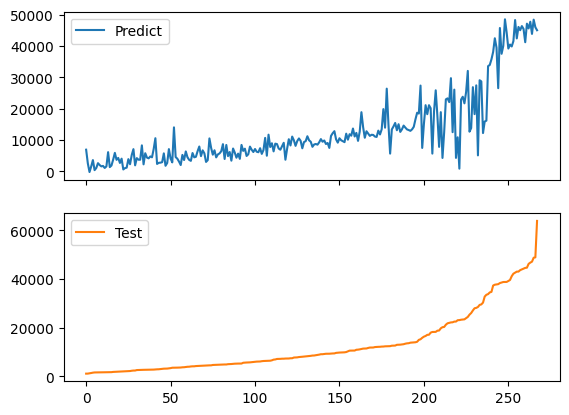

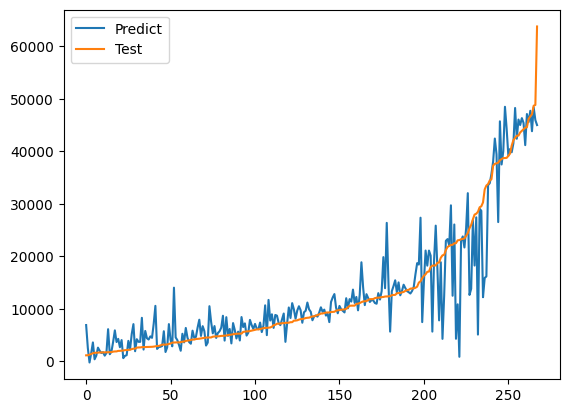

In [ ]:
y_test = np.array(y_test)
d = {'Predict': pred_1, 'Test': y_test}
fg = pd.DataFrame(data=d)
fg = fg.sort_values('Test').reset_index().drop(columns='index')
fg.plot.line(subplots=True)
fg.plot.line()

<Axes: >

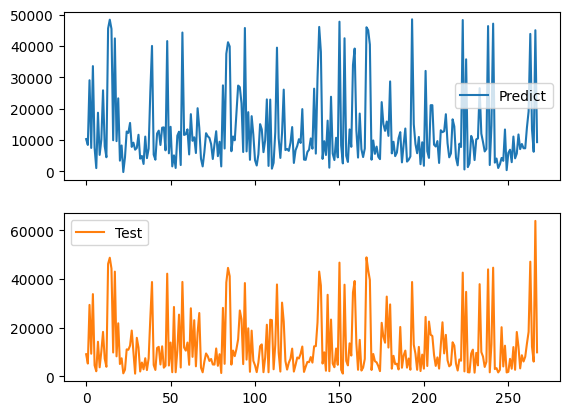

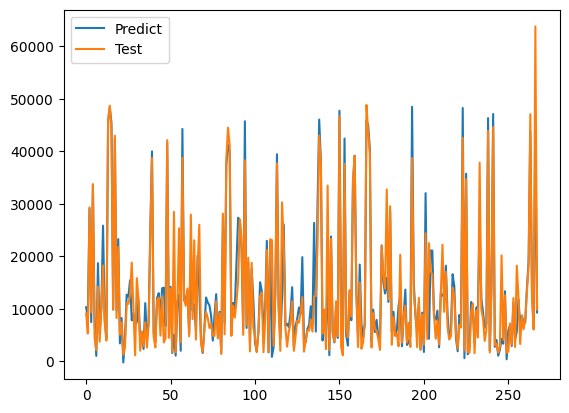

In [ ]:
y_test = np.array(y_test)
d = {'Predict': pred_1, 'Test': y_test}
fg = pd.DataFrame(data=d)
fg.plot.line(subplots=True)
fg.plot.line()

# Data and Clean Data

In [ ]:
path = "/content/insurance.csv"
df = pd.read_csv(path)
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
male = 1
female = 2
df['sex'] = [male if a == 'male' else female for a in df['sex']]
df

,age,sex,bmi,children,smoker,region,charges
0,19,2,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,no,northwest,10600.54830
1334,18,2,31.920,0,no,northeast,2205.98080
1335,18,2,36.850,0,no,southeast,1629.83350
1336,21,2,25.800,0,no,southwest,2007.94500


In [ ]:
yes = 1
no = 0
df['smoker'] = [yes if a == 'yes' else no for a in df['smoker']]
df

,age,sex,bmi,children,smoker,region,charges
0,19,2,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,2,31.920,0,0,northeast,2205.98080
1335,18,2,36.850,0,0,southeast,1629.83350
1336,21,2,25.800,0,0,southwest,2007.94500


In [ ]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [ ]:
def c_region(r):
  if r == 'southeast':
    return 1
  elif r =='southwest':
    return 2
  elif r =='northwest':
    return 3
  elif r =='northeast':
    return 4

In [ ]:
df['region'] = [c_region(i) for i in df['region']]
df

,age,sex,bmi,children,smoker,region,charges
0,19,2,27.900,0,1,2,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,3,10600.54830
1334,18,2,31.920,0,0,4,2205.98080
1335,18,2,36.850,0,0,1,1629.83350
1336,21,2,25.800,0,0,2,2007.94500


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [ ]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,1.494768,30.663397,1.094918,0.204783,2.455157,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.130197,12110.011237
min,18.000000,1.000000,15.960000,0.000000,0.000000,1.000000,1121.873900
25%,27.000000,1.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,2.000000,34.693750,2.000000,0.000000,3.000000,16639.912515
max,64.000000,2.000000,53.130000,5.000000,1.000000,4.000000,63770.428010


# Detect and Delete Outliers

In [ ]:
# calculate IQR for column Height
Q1 = df['charges'].quantile(0.25)
Q3 = df['charges'].quantile(0.75)
IQR = Q3 - Q1

# identify outliers
threshold = 1.5
outliers = df[(df['charges'] < Q1 - threshold * IQR) | (df['charges'] > Q3 + threshold * IQR)]

# drop rows containing outliers
df = df.drop(outliers.index)

In [ ]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,2,27.900,0,1,2,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,3,10600.54830
1334,18,2,31.920,0,0,4,2205.98080
1335,18,2,36.850,0,0,1,1629.83350
1336,21,2,25.800,0,0,2,2007.94500


# Peparation

In [ ]:
X = df.drop(columns= ['charges'])
X

,age,sex,bmi,children,smoker,region
0,19,2,27.900,0,1,2
1,18,1,33.770,1,0,1
2,28,1,33.000,3,0,1
3,33,1,22.705,0,0,3
4,32,1,28.880,0,0,3
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,3
1334,18,2,31.920,0,0,4
1335,18,2,36.850,0,0,1
1336,21,2,25.800,0,0,2


In [ ]:
y = df['charges']
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1199, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 42)
X_train
X_test

,age,sex,bmi,children,smoker,region
1315,18,1,28.310,1,0,4
965,35,1,27.100,1,0,2
117,29,2,27.940,1,1,1
492,18,2,25.080,0,0,4
69,28,1,23.980,3,1,1
...,...,...,...,...,...,...
432,42,1,26.900,0,0,2
967,44,1,25.365,1,0,3
604,19,2,28.310,0,1,3
1331,23,2,33.400,0,0,2


# Modeling

In [ ]:
model = xgb.XGBRegressor().fit(X_train, y_train)

In [ ]:
model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

# Evaluation

In [ ]:
pred_2 = model.predict(X_test)

In [ ]:
from sklearn import metrics
print("MAE = ",metrics.mean_absolute_error(y_test,pred_2))
print("MSE = ",metrics.mean_squared_error(y_test,pred_2))
print("RMSE = ",np.sqrt(metrics.mean_squared_error(y_test,pred_2)))
#แสดงค่าความแม่นยำด้วย R-Square หากมีค่าเป็น 1 แสดงว่าแม่นยำที่สุด
print("Score = ",metrics.r2_score(y_test,pred_2))

MAE =  2984.843944331079
MSE =  29576591.73092589
RMSE =  5438.43651529793
Score =  0.5258664359877108


In [ ]:
from sklearn.model_selection import cross_val_score

# ทำ Cross Validation และประเมินค่า R^2
cv_scores = cross_val_score(model, X_train, y_train, cv=10, scoring='r2')

# พิมพ์ค่า R^2 ของแต่ละ Fold
print("R^2 scores:", cv_scores)

# คำนวณค่า R^2 ที่เฉลี่ยของทั้งหมด
print("Average R^2:", np.mean(cv_scores))

R^2 scores: [0.48218622 0.39980969 0.60998751 0.38385754 0.54948486 0.58400014
 0.52757778 0.61673778 0.54230286 0.30390903]
Average R^2: 0.4999853416834902


<Axes: >

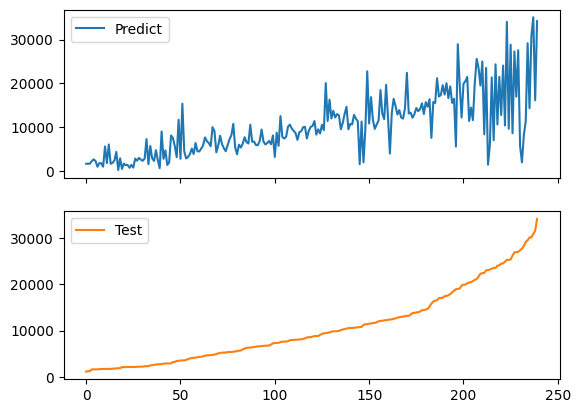

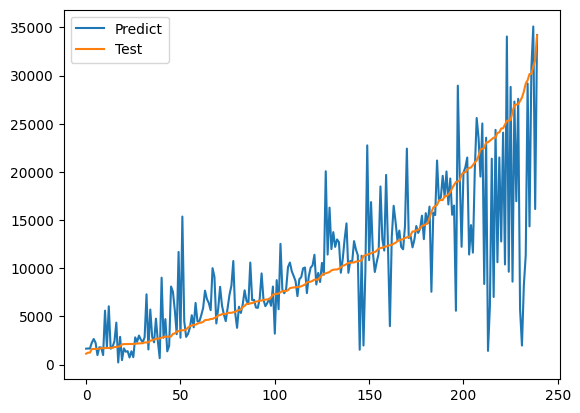

In [ ]:
y_test = np.array(y_test)
d = {'Predict': pred_2, 'Test': y_test}
fg = pd.DataFrame(data=d)
fg = fg.sort_values('Test').reset_index().drop(columns='index')
fg.plot.line(subplots=True)
fg.plot.line()


<Axes: >

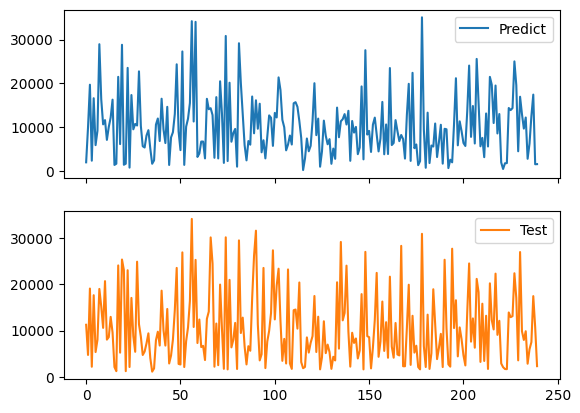

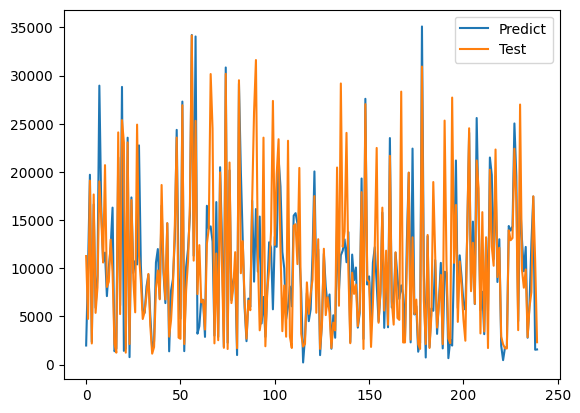

In [ ]:
y_test = np.array(y_test)
d = {'Predict': pred_2, 'Test': y_test}
fg = pd.DataFrame(data=d)
fg.plot.line(subplots=True)
fg.plot.line()

# **Classification**

# Data and Clean Data

In [ ]:
path = "/content/insurance.csv"
df = pd.read_csv(path)
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
male = 1
female = 2
df['sex'] = [male if a == 'male' else female for a in df['sex']]
df

,age,sex,bmi,children,smoker,region,charges
0,19,2,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,no,northwest,10600.54830
1334,18,2,31.920,0,no,northeast,2205.98080
1335,18,2,36.850,0,no,southeast,1629.83350
1336,21,2,25.800,0,no,southwest,2007.94500


In [ ]:
yes = 1
no = 0
df['smoker'] = [yes if a == 'yes' else no for a in df['smoker']]
df

,age,sex,bmi,children,smoker,region,charges
0,19,2,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,2,31.920,0,0,northeast,2205.98080
1335,18,2,36.850,0,0,southeast,1629.83350
1336,21,2,25.800,0,0,southwest,2007.94500


In [ ]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [ ]:
def c_region(r):
  if r == 'southeast':
    return 1
  elif r =='southwest':
    return 2
  elif r =='northwest':
    return 3
  elif r =='northeast':
    return 4

In [ ]:
df['region'] = [c_region(i) for i in df['region']]
df

,age,sex,bmi,children,smoker,region,charges
0,19,2,27.900,0,1,2,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,3,10600.54830
1334,18,2,31.920,0,0,4,2205.98080
1335,18,2,36.850,0,0,1,1629.83350
1336,21,2,25.800,0,0,2,2007.94500


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [ ]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,1.494768,30.663397,1.094918,0.204783,2.455157,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.130197,12110.011237
min,18.000000,1.000000,15.960000,0.000000,0.000000,1.000000,1121.873900
25%,27.000000,1.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,2.000000,34.693750,2.000000,0.000000,3.000000,16639.912515
max,64.000000,2.000000,53.130000,5.000000,1.000000,4.000000,63770.428010


# For Classification

In [ ]:
df['charges'] = round(df['charges'],-3)

In [ ]:
df['rank'] = df['charges'].rank(method='dense') -1

In [ ]:
#df[df['charges'] < 2000000]['rank'].value_counts()

# Peparation

In [ ]:
X = df.drop(columns= ['charges','rank'])
X

,age,sex,bmi,children,smoker,region
0,19,2,27.900,0,1,2
1,18,1,33.770,1,0,1
2,28,1,33.000,3,0,1
3,33,1,22.705,0,0,3
4,32,1,28.880,0,0,3
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,3
1334,18,2,31.920,0,0,4
1335,18,2,36.850,0,0,1
1336,21,2,25.800,0,0,2


In [ ]:
y = df['rank']
y

0       16.0
1        1.0
2        3.0
3       21.0
4        3.0
        ... 
1333    10.0
1334     1.0
1335     1.0
1336     1.0
1337    28.0
Name: rank, Length: 1338, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 42)
X_train
X_test

,age,sex,bmi,children,smoker,region
764,45,2,25.175,2,0,4
887,36,2,30.020,0,0,3
890,64,2,26.885,0,1,3
1293,46,1,25.745,3,0,3
259,19,1,31.920,0,1,3
...,...,...,...,...,...,...
109,63,1,35.090,0,1,1
575,58,2,27.170,0,0,3
535,38,1,28.025,1,0,4
543,54,2,47.410,0,1,1


# Modeling

In [ ]:
df['rank'].value_counts().count()

57

In [ ]:
(df['rank'] == 0).value_counts()

False    1318
True       20
Name: rank, dtype: int64

In [ ]:
model = xgb.XGBClassifier().fit(X_train, y_train)

# Evaluation

In [ ]:
pred_3 = model.predict(X_test)

In [ ]:
y_test = np.array(y_test)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

precision = precision_score(y_test, pred_3, average='weighted')
recall = recall_score(y_test, pred_3, average='weighted')
f1 = f1_score(y_test, pred_3, average='weighted')
accuracy = accuracy_score(y_test, pred_3)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.47761194029850745
Precision: 0.452405259660452
Recall: 0.47761194029850745
F1-score: 0.45604749640192443


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Data and Clean Data

In [ ]:
path = "/content/insurance.csv"
df = pd.read_csv(path)
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
male = 1
female = 2
df['sex'] = [male if a == 'male' else female for a in df['sex']]
df

,age,sex,bmi,children,smoker,region,charges
0,19,2,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,no,northwest,10600.54830
1334,18,2,31.920,0,no,northeast,2205.98080
1335,18,2,36.850,0,no,southeast,1629.83350
1336,21,2,25.800,0,no,southwest,2007.94500


In [ ]:
yes = 1
no = 0
df['smoker'] = [yes if a == 'yes' else no for a in df['smoker']]
df

,age,sex,bmi,children,smoker,region,charges
0,19,2,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,2,31.920,0,0,northeast,2205.98080
1335,18,2,36.850,0,0,southeast,1629.83350
1336,21,2,25.800,0,0,southwest,2007.94500


In [ ]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [ ]:
def c_region(r):
  if r == 'southeast':
    return 1
  elif r =='southwest':
    return 2
  elif r =='northwest':
    return 3
  elif r =='northeast':
    return 4

In [ ]:
df['region'] = [c_region(i) for i in df['region']]
df

,age,sex,bmi,children,smoker,region,charges
0,19,2,27.900,0,1,2,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,3,10600.54830
1334,18,2,31.920,0,0,4,2205.98080
1335,18,2,36.850,0,0,1,1629.83350
1336,21,2,25.800,0,0,2,2007.94500


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [ ]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,1.494768,30.663397,1.094918,0.204783,2.455157,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.130197,12110.011237
min,18.000000,1.000000,15.960000,0.000000,0.000000,1.000000,1121.873900
25%,27.000000,1.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,2.000000,34.693750,2.000000,0.000000,3.000000,16639.912515
max,64.000000,2.000000,53.130000,5.000000,1.000000,4.000000,63770.428010


# For Classification

In [ ]:
df['rank'] = pd.cut(df['charges'], bins=range(0, int(df['charges'].max()) + 5001, 5000), labels=False)

In [ ]:
# df[df['charges'] < 2000000]['rank'].value_counts()

# Peparation

In [ ]:
#X = df.drop(columns= ['charges','rank'])
X = df[['age','smoker']]
X

,age,smoker
0,19,1
1,18,0
2,28,0
3,33,0
4,32,0
...,...,...
1333,50,0
1334,18,0
1335,18,0
1336,21,0


In [ ]:
y = df['rank']
y

0       3
1       0
2       0
3       4
4       0
       ..
1333    2
1334    0
1335    0
1336    0
1337    5
Name: rank, Length: 1338, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 42)
X_train
X_test

,age,smoker
764,45,0
887,36,0
890,64,1
1293,46,0
259,19,1
...,...,...
109,63,1
575,58,0
535,38,0
543,54,1


# Modeling

In [ ]:
df['rank'].value_counts().count()

13

In [ ]:
(df['rank'] == 0).value_counts()

False    979
True     359
Name: rank, dtype: int64

In [ ]:
model = xgb.XGBClassifier().fit(X_train, y_train)

# Evaluation

In [ ]:
pred_3 = model.predict(X_test)

In [ ]:
y_test = np.array(y_test)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

precision = precision_score(y_test, pred_3, average='weighted')
recall = recall_score(y_test, pred_3, average='weighted')
f1 = f1_score(y_test, pred_3, average='weighted')
accuracy = accuracy_score(y_test, pred_3)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.7388059701492538
Precision: 0.7062158855637115
Recall: 0.7388059701492538
F1-score: 0.7140273814635476


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score, recall_score, f1_score

# กำหนดพารามิเตอร์ของ cross-validation
n = KFold(n_splits=5, shuffle=True, random_state=42)
#n = 5

# ทำ Cross-validation และคำนวณค่า Precision, Recall, และ F1-score
scores = cross_val_score(model, X_train, y_train, cv = n, scoring='accuracy')
precision_scores = cross_val_score(model, X_train, y_train, cv = n, scoring='precision_macro')
recall_scores = cross_val_score(model, X_train, y_train, cv = n, scoring='recall_macro')
f1_scores = cross_val_score(model, X_train, y_train, cv = n, scoring='f1_macro')

# แสดงค่า Accuracy สำหรับแต่ละ fold และค่าเฉลี่ยของ Accuracy
print("Accuracy scores for each fold:", scores)
print("Mean accuracy:", scores.mean())
print("Precision scores for each fold:", precision_scores)
print("Mean precision:", precision_scores.mean())
print("Recall scores for each fold:", recall_scores)
print("Mean recall:", recall_scores.mean())
print("F1 scores for each fold:", f1_scores)
print("Mean F1-score:", f1_scores.mean())


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

Accuracy scores for each fold: [0.70093458 0.69626168 0.71962617 0.71495327 0.64953271]
Mean accuracy: 0.6962616822429907
Precision scores for each fold: [0.4050882  0.37718427 0.37286878 0.2658443  0.33266108]
Mean precision: 0.3507293261083066
Recall scores for each fold: [0.37861779 0.33554487 0.39151417 0.29836113 0.34203623]
Mean recall: 0.3492148378765895
F1 scores for each fold: [0.35664502 0.33402725 0.35759058 0.27741838 0.33333748]
Mean F1-score: 0.33180374024181575


# Data and Clean Data

In [ ]:
path = "/content/insurance.csv"
df = pd.read_csv(path)
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
male = 1
female = 2
df['sex'] = [male if a == 'male' else female for a in df['sex']]
df

,age,sex,bmi,children,smoker,region,charges
0,19,2,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,no,northwest,10600.54830
1334,18,2,31.920,0,no,northeast,2205.98080
1335,18,2,36.850,0,no,southeast,1629.83350
1336,21,2,25.800,0,no,southwest,2007.94500


In [ ]:
yes = 1
no = 0
df['smoker'] = [yes if a == 'yes' else no for a in df['smoker']]
df

,age,sex,bmi,children,smoker,region,charges
0,19,2,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,2,31.920,0,0,northeast,2205.98080
1335,18,2,36.850,0,0,southeast,1629.83350
1336,21,2,25.800,0,0,southwest,2007.94500


In [ ]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [ ]:
def c_region(r):
  if r == 'southeast':
    return 1
  elif r =='southwest':
    return 2
  elif r =='northwest':
    return 3
  elif r =='northeast':
    return 4

In [ ]:
df['region'] = [c_region(i) for i in df['region']]
df

,age,sex,bmi,children,smoker,region,charges
0,19,2,27.900,0,1,2,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,3,10600.54830
1334,18,2,31.920,0,0,4,2205.98080
1335,18,2,36.850,0,0,1,1629.83350
1336,21,2,25.800,0,0,2,2007.94500


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [ ]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,1.494768,30.663397,1.094918,0.204783,2.455157,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.130197,12110.011237
min,18.000000,1.000000,15.960000,0.000000,0.000000,1.000000,1121.873900
25%,27.000000,1.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,2.000000,34.693750,2.000000,0.000000,3.000000,16639.912515
max,64.000000,2.000000,53.130000,5.000000,1.000000,4.000000,63770.428010


# Detect and Delete Outliers

In [ ]:
# calculate IQR for column Height
Q1 = df['charges'].quantile(0.25)
Q3 = df['charges'].quantile(0.75)
IQR = Q3 - Q1

# identify outliers
threshold = 1.5
outliers = df[(df['charges'] < Q1 - threshold * IQR) | (df['charges'] > Q3 + threshold * IQR)]

# drop rows containing outliers
df = df.drop(outliers.index)

In [ ]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,2,27.900,0,1,2,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,3,21984.47061
4,32,1,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,3,10600.54830
1334,18,2,31.920,0,0,4,2205.98080
1335,18,2,36.850,0,0,1,1629.83350
1336,21,2,25.800,0,0,2,2007.94500


# For Classification

In [ ]:
df['rank'] = pd.cut(df['charges'], bins=range(0, int(df['charges'].max()) + 5001, 5000), labels=False)

In [ ]:
# df[df['charges'] < 2000000]['rank'].value_counts()

# Peparation

In [ ]:
X = df.drop(columns= ['charges','rank'])
#X = df[['age','smoker']]
X

,age,sex,bmi,children,smoker,region
0,19,2,27.900,0,1,2
1,18,1,33.770,1,0,1
2,28,1,33.000,3,0,1
3,33,1,22.705,0,0,3
4,32,1,28.880,0,0,3
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,3
1334,18,2,31.920,0,0,4
1335,18,2,36.850,0,0,1
1336,21,2,25.800,0,0,2


In [ ]:
y = df['rank']
y

0       3
1       0
2       0
3       4
4       0
       ..
1333    2
1334    0
1335    0
1336    0
1337    5
Name: rank, Length: 1199, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 42)
X_train
X_test

,age,sex,bmi,children,smoker,region
1315,18,1,28.310,1,0,4
965,35,1,27.100,1,0,2
117,29,2,27.940,1,1,1
492,18,2,25.080,0,0,4
69,28,1,23.980,3,1,1
...,...,...,...,...,...,...
432,42,1,26.900,0,0,2
967,44,1,25.365,1,0,3
604,19,2,28.310,0,1,3
1331,23,2,33.400,0,0,2


# Modeling

In [ ]:
df['rank'].value_counts().count()

7

In [ ]:
(df['rank'] == 0).value_counts()

False    840
True     359
Name: rank, dtype: int64

In [ ]:
model = xgb.XGBClassifier().fit(X_train, y_train)

# Evaluation

In [ ]:
pred_3 = model.predict(X_test)

In [ ]:
y_test = np.array(y_test)

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

precision = precision_score(y_test, pred_3, average='weighted')
recall = recall_score(y_test, pred_3, average='weighted')
f1 = f1_score(y_test, pred_3, average='weighted')
accuracy = accuracy_score(y_test, pred_3)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.8166666666666667
Precision: 0.8035987197909467
Recall: 0.8166666666666667
F1-score: 0.8018220818220819


In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score, recall_score, f1_score

# กำหนดพารามิเตอร์ของ cross-validation
n = KFold(n_splits=10, shuffle=True, random_state=42)
#n = 5

# ทำ Cross-validation และคำนวณค่า Precision, Recall, และ F1-score
scores = cross_val_score(model, X_train, y_train, cv = n, scoring='accuracy')
precision_scores = cross_val_score(model, X_train, y_train, cv = n, scoring='precision_macro')
recall_scores = cross_val_score(model, X_train, y_train, cv = n, scoring='recall_macro')
f1_scores = cross_val_score(model, X_train, y_train, cv = n, scoring='f1_macro')

# แสดงค่า Accuracy สำหรับแต่ละ fold และค่าเฉลี่ยของ Accuracy
#print("Accuracy scores for each fold:", scores)
print("Mean accuracy:", scores.mean())
#print("Precision scores for each fold:", precision_scores)
print("Mean precision:", precision_scores.mean())
#print("Recall scores for each fold:", recall_scores)
print("Mean recall:", recall_scores.mean())
#print("F1 scores for each fold:", f1_scores)
print("Mean F1-score:", f1_scores.mean())


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Mean accuracy: 0.861326754385965
Mean precision: 0.8048012330142418
Mean recall: 0.7207372793588631
Mean F1-score: 0.7432257027800816


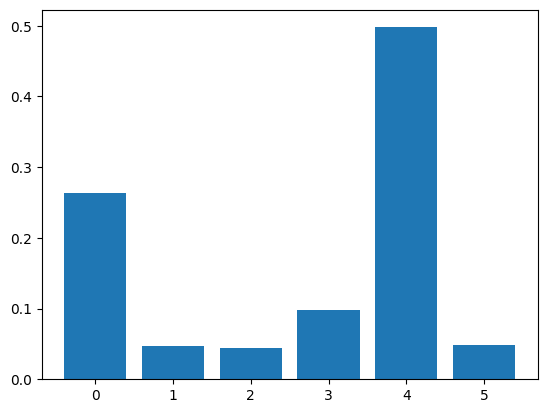

In [ ]:
importance = model.feature_importances_

# พล็อต Feature Importance
import matplotlib.pyplot as plt
plt.bar(range(len(importance)), importance)
plt.show()

In [ ]:
y_test

array([2, 0, 3, 0, 3, 1, 1, 3, 3, 2, 4, 1, 1, 2, 1, 0, 0, 4, 1, 5, 4, 0,
       4, 0, 3, 1, 1, 4, 2, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 3, 2, 1, 2,
       0, 0, 1, 2, 4, 0, 0, 5, 0, 1, 2, 3, 6, 2, 5, 1, 2, 1, 1, 0, 2, 2,
       6, 4, 0, 2, 0, 3, 2, 0, 6, 0, 4, 1, 1, 2, 0, 5, 1, 2, 1, 0, 1, 1,
       3, 5, 6, 2, 0, 0, 4, 0, 1, 1, 2, 5, 2, 3, 4, 2, 0, 1, 0, 4, 0, 0,
       2, 2, 2, 4, 0, 0, 0, 1, 1, 1, 1, 3, 1, 2, 0, 0, 2, 1, 1, 1, 0, 0,
       0, 4, 1, 5, 2, 2, 4, 1, 0, 1, 1, 1, 0, 1, 3, 0, 5, 1, 1, 0, 1, 2,
       4, 0, 1, 3, 1, 2, 0, 4, 1, 0, 2, 0, 0, 5, 0, 0, 2, 3, 0, 2, 1, 1,
       0, 0, 6, 1, 0, 2, 0, 1, 3, 2, 0, 1, 1, 0, 5, 2, 0, 0, 5, 2, 3, 0,
       2, 1, 0, 0, 2, 4, 1, 2, 1, 4, 3, 0, 3, 0, 2, 0, 4, 2, 2, 4, 1, 2,
       0, 0, 0, 0, 2, 2, 2, 4, 3, 0, 5, 1, 1, 1, 0, 1, 1, 3, 2, 0])

In [ ]:
pred_3

array([0, 0, 3, 0, 3, 1, 1, 3, 3, 2, 2, 1, 1, 2, 1, 0, 0, 4, 1, 5, 0, 0,
       4, 0, 3, 1, 3, 1, 2, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 6, 1, 1, 2,
       0, 0, 1, 2, 4, 0, 0, 5, 0, 1, 2, 3, 6, 2, 4, 0, 0, 1, 1, 0, 2, 2,
       2, 2, 0, 2, 0, 4, 1, 0, 5, 0, 4, 1, 1, 2, 0, 5, 5, 2, 1, 0, 1, 1,
       3, 1, 2, 2, 0, 0, 1, 0, 1, 1, 2, 1, 2, 2, 4, 2, 0, 1, 0, 0, 0, 0,
       2, 3, 2, 1, 0, 0, 0, 1, 1, 1, 1, 3, 1, 2, 0, 0, 2, 1, 1, 1, 0, 0,
       0, 2, 1, 2, 2, 2, 0, 2, 0, 1, 1, 1, 0, 1, 4, 0, 5, 1, 1, 0, 1, 2,
       0, 0, 1, 3, 1, 2, 0, 4, 1, 0, 2, 3, 1, 1, 0, 0, 2, 3, 0, 2, 1, 1,
       0, 0, 5, 1, 0, 2, 0, 1, 0, 2, 0, 1, 1, 0, 1, 1, 0, 0, 0, 2, 3, 0,
       2, 1, 0, 0, 2, 4, 1, 2, 1, 1, 3, 0, 1, 0, 2, 0, 4, 2, 2, 4, 1, 2,
       0, 0, 0, 0, 2, 2, 2, 5, 3, 0, 2, 1, 1, 1, 0, 1, 1, 3, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred_3)

array([[67,  2,  0,  1,  0,  0,  0],
       [ 1, 61,  1,  1,  0,  1,  0],
       [ 3,  3, 40,  1,  0,  0,  0],
       [ 1,  1,  1, 14,  2,  0,  1],
       [ 4,  4,  3,  0,  9,  1,  0],
       [ 1,  4,  2,  0,  1,  4,  0],
       [ 0,  0,  2,  0,  0,  2,  1]])

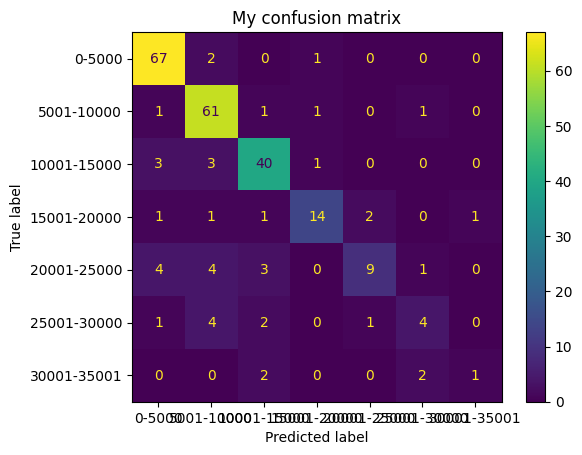

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

labels = ['0-5000','5001-10000','10001-15000','15001-20000','20001-25000','25001-30000','30001-35001']


cm = confusion_matrix(y_test, pred_3)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()
plt.title("My confusion matrix")
plt.show()

In [ ]:
from sklearn.metrics import classification_report

# สร้าง Multi-class Classification Report
report = classification_report(y_test, pred_3)
print(report)

              precision    recall  f1-score   support

           0       0.87      0.96      0.91        70
           1       0.81      0.94      0.87        65
           2       0.82      0.85      0.83        47
           3       0.82      0.70      0.76        20
           4       0.75      0.43      0.55        21
           5       0.50      0.33      0.40        12
           6       0.50      0.20      0.29         5

    accuracy                           0.82       240
   macro avg       0.72      0.63      0.66       240
weighted avg       0.80      0.82      0.80       240



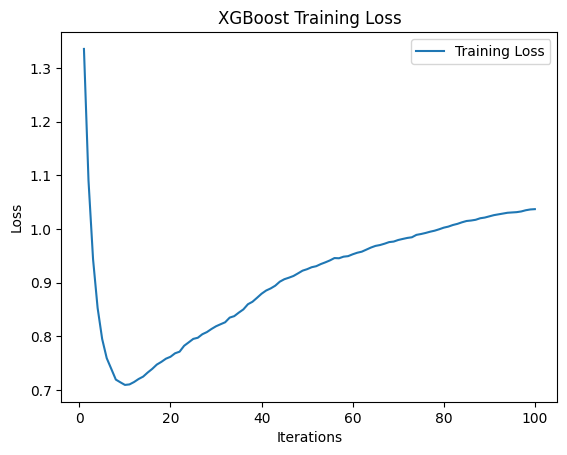

In [ ]:
import matplotlib.pyplot as plt
import xgboost as xgb

# สร้างชุดข้อมูลสำหรับฝึกและการตรวจสอบ
train_data = xgb.DMatrix(X_train, label=y_train)
test_data = xgb.DMatrix(X_test, label=y_test)

# กำหนดพารามิเตอร์ที่ใช้ในการฝึกโมเดล
params = {
    'objective': 'multi:softmax',  # กำหนดว่าจะใช้ multi-class softmax loss
    'num_class': 7,       # จำนวนคลาสในข้อมูล
    'eval_metric': 'mlogloss'       # กำหนดเมตริกที่ใช้ในการวัด loss
}

# ฝึกโมเดล XGBoost
num_rounds = 100
eval_results = {}
model = xgb.train(params, train_data, num_rounds, evals=[(test_data, 'eval')], evals_result=eval_results, verbose_eval=False)

# พล็อต loss ของการฝึกและการตรวจสอบ
train_losses = eval_results['eval']['mlogloss']
plt.plot(range(1, num_rounds+1), train_losses, label='Training Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('XGBoost Training Loss')
plt.legend()
plt.show()

# Loop

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 MB 6.3 MB/s eta 0:00:00


In [ ]:
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [ ]:
l_round = [2000,3000,4000,5000]
l_models = [
   [KNeighborsClassifier(n_neighbors = 3), ' KNeighborsClassifier'],
   [GaussianNB(), 'naive_bayes'],
   [DecisionTreeClassifier(), 'DecisionTreeClassifier'],
   [GradientBoostingClassifier(), 'XGBoostClassifier'],
   [RandomForestClassifier(), 'RandomForestClassifier']]
  #  [BaggingClassifier(), 'BaggingClassifier'],
  #  [AdaBoostClassifier(), 'AdaBoostClassifier'],
  #  [ExtraTreesClassifier(), 'ExtraTreesClassifier'],
  #  [MLPClassifier(), 'MLPClassifier'],
  #  [SVC(), 'SVC'],
  #  [GradientBoostingClassifier(), 'GaussianProcessClassifier'],
  #  [LGBMClassifier(), 'lightGBMClassifier'],
  #  [CatBoostClassifier(), 'CatBoostClassifier']
#]
Ef = []
Ef_cross = []
l_col = ['Model','Accuracy','Precision','Recall','F1']

for i in l_round:
  print(i)
  df['rank'] = pd.cut(df['charges'], bins=range(0, int(df['charges'].max()) + i-1, i), labels=False)
  print(df)
  X = df.drop(columns= ['charges','rank'])
  y = df['rank']
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state = 42)
  y_test = np.array(y_test)
  for j in l_models:
    model = j[0].fit(X_train, y_train)
    pred = model.predict(X_test)
    #
    precision = precision_score(y_test, pred, average='weighted')
    recall = recall_score(y_test, pred, average='weighted')
    f1 = f1_score(y_test, pred, average='weighted')
    accuracy = accuracy_score(y_test, pred)
    Ef.append([j[1],accuracy,precision,recall,f1])
    #
    accuracy_scores = cross_val_score(model, X_train, y_train, cv = n, scoring='accuracy').mean()
    precision_scores = cross_val_score(model, X_train, y_train, cv = n, scoring='precision_macro').mean()
    recall_scores = cross_val_score(model, X_train, y_train, cv = n, scoring='recall_macro').mean()
    f1_scores = cross_val_score(model, X_train, y_train, cv = n, scoring='f1_macro').mean()
    Ef_cross.append([j[1],accuracy_scores,precision_scores,recall_scores,f1_scores])
    #
df_md = pd.DataFrame((Ef), columns = l_col)


2000
      age  sex     bmi  children  smoker  region      charges  rank
0      19    2  27.900         0       1       2  16884.92400     8
1      18    1  33.770         1       0       1   1725.55230     0
2      28    1  33.000         3       0       1   4449.46200     2
3      33    1  22.705         0       0       3  21984.47061    10
4      32    1  28.880         0       0       3   3866.85520     1
...   ...  ...     ...       ...     ...     ...          ...   ...
1333   50    1  30.970         3       0       3  10600.54830     5
1334   18    2  31.920         0       0       4   2205.98080     1
1335   18    2  36.850         0       0       1   1629.83350     0
1336   21    2  25.800         0       0       2   2007.94500     1
1337   61    2  29.070         0       1       3  29141.36030    14

[1338 rows x 8 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

3000
      age  sex     bmi  children  smoker  region      charges  rank
0      19    2  27.900         0       1       2  16884.92400     5
1      18    1  33.770         1       0       1   1725.55230     0
2      28    1  33.000         3       0       1   4449.46200     1
3      33    1  22.705         0       0       3  21984.47061     7
4      32    1  28.880         0       0       3   3866.85520     1
...   ...  ...     ...       ...     ...     ...          ...   ...
1333   50    1  30.970         3       0       3  10600.54830     3
1334   18    2  31.920         0       0       4   2205.98080     0
1335   18    2  36.850         0       0       1   1629.83350     0
1336   21    2  25.800         0       0       2   2007.94500     0
1337   61    2  29.070         0       1       3  29141.36030     9

[1338 rows x 8 columns]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning

In [ ]:
df_md

In [ ]:
a = [1,2,3,4,5,6,7,8]

col = [11,22,33,44]
aa = pd.DataFrame(a,columns = col, index = [2,3])
aa

ValueError: Shape of passed values is (8, 1), indices imply (2, 4)

In [ ]:
bb = aa+aa

In [ ]:
df_md

,0,1
0,"[ KNeighborsClassifier, 0.6417910447761194, 0....","[ KNeighborsClassifier, 0.6865671641791045, 0...."
1,"[ KNeighborsClassifier, 0.6299065420560748, 0....","[ KNeighborsClassifier, 0.6495327102803738, 0...."


In [ ]:
pd.DataFrame(Ef_cross)

,0,1,2,3
0,0.595362,0.387334,0.380071,0.359035
1,0.531798,0.341616,0.335974,0.323977
2,0.686129,0.494120,0.506624,0.502598
3,0.765406,0.573136,0.543253,0.546545
4,0.740351,0.558641,0.551654,0.551645
5,0.753882,0.582555,0.572041,0.566975
6,0.379561,0.140474,0.207203,0.149558
7,0.732050,0.535052,0.526208,0.516791
8,0.438015,0.304063,0.296457,0.275132
9,0.556776,0.258323,0.316619,0.273439


In [ ]:
Ef_cross

[[0.5953618421052632,
  0.3873336322342293,
  0.3800706978077426,
  0.35903527662407314],
 [0.531798245614035,
  0.3416160550100577,
  0.33597388193007066,
  0.3239773625993617],
 [0.6861293859649122,
  0.4941197649028532,
  0.5066241073676298,
  0.5025976347094099],
 [0.7654057017543859,
  0.5731357068657026,
  0.5432529173393851,
  0.5465452425669175],
 [0.7403508771929824,
  0.5586414619379015,
  0.5516540546531354,
  0.5516447187482643],
 [0.7538815789473685,
  0.5825546017885576,
  0.5720406794322236,
  0.566975355984564],
 [0.37956140350877193,
  0.140474312924802,
  0.20720300952224974,
  0.14955811233779753],
 [0.7320504385964912,
  0.5350523936073696,
  0.5262077147503005,
  0.5167906433503748],
 [0.43801535087719295,
  0.30406277469377313,
  0.29645731271148407,
  0.2751324731613082],
 [0.5567763157894736,
  0.2583234815693968,
  0.3166185219717258,
  0.2734387419384157],
 [0.7601973684210526,
  0.5748551452092218,
  0.547940642785689,
  0.5398145189631192],
 [0.7591447368421